In [256]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2018)

In [257]:
X_train = []
X_test = []

In [258]:
# with h5py.File('Xception_f.h5', 'r') as h:
#     X_train.append(np.array(h['train']))
#     X_test.append(np.array(h['test']))
#     y_train = np.array(h['label'])
    
with h5py.File('Xception_31.h5', 'r') as h:
    X_train.append(np.array(h['train']))
    X_test.append(np.array(h['test']))
    y_train = np.array(h['label'])

In [259]:
X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)

In [260]:
X_train, y_train = shuffle(X_train, y_train)

In [261]:
from keras.models import *
from keras.layers import *

In [262]:
input_tensor = Input(X_train.shape[1:])
x = input_tensor
# 使用Dropout随机丢掉一部分特征
x = Dropout(0.5)(x)
# 使用sigmoid作为激活函数
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)
# 使用RMSprop优化器
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [263]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot,plot_model

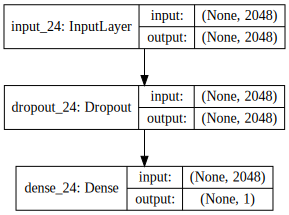

In [264]:
# 进行可视化
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
# plot_model(model, to_file='model.png',show_shapes=True)

In [265]:
# 训练集和验证集8:2分割
model.fit(X_train, y_train, batch_size=256, epochs=16, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/16
20000/20000 [==============================] - 1s 45us/step - loss: 0.1954 - acc: 0.9614 - val_loss: 0.0668 - val_acc: 0.9882
Epoch 2/16
20000/20000 [==============================] - 0s 16us/step - loss: 0.0557 - acc: 0.9851 - val_loss: 0.0404 - val_acc: 0.9894
Epoch 3/16
20000/20000 [==============================] - 0s 15us/step - loss: 0.0424 - acc: 0.9861 - val_loss: 0.0341 - val_acc: 0.9898
Epoch 4/16
20000/20000 [==============================] - 0s 17us/step - loss: 0.0368 - acc: 0.9875 - val_loss: 0.0313 - val_acc: 0.9904
Epoch 5/16
20000/20000 [==============================] - 0s 16us/step - loss: 0.0350 - acc: 0.9882 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 6/16
20000/20000 [==============================] - 0s 16us/step - loss: 0.0339 - acc: 0.9881 - val_loss: 0.0291 - val_acc: 0.9910
Epoch 7/16
20000/20000 [==============================] - 0s 15us/step - loss: 0.0326 - acc: 0.9890 - val_loss: 0.0288 - val_acc:

In [266]:
model.save('model.h5')

In [267]:
y_pred = model.predict(X_test)
y_pred = y_pred.clip(min=0.005, max=0.995)

In [268]:
import pandas as pd
from keras.preprocessing.image import *

In [269]:

df = pd.read_csv("data/sample_submission.csv")
# df.head(8)

test_gen = ImageDataGenerator()
test_generator = test_gen.flow_from_directory("data/test", (299, 299), shuffle=False,
                                         batch_size=64, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    # print(i, fname, y_pred[i])
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])      
#     print(index-1, y_pred[i])
    df.set_value(index-1, 'label', y_pred[i])   
# index=None，将index不写入csv文件
# df.to_csv('pred.csv')
# df.to_csv('pred.csv', index=None)
df.to_csv('pred1.csv', index=None)
df.head(8)

Found 12500 images belonging to 1 classes.


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
